# CPI prediction project
#### STATS 131


## 1. Objective:
To predict CPI (customer price index) of countries using predictors that are relevant to the economic growth. 

## 2. Introduction:
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Dataset sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   

## 3.  Data Clean-up:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()  # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Consumer price index: General,71.1
1,4,Afghanistan,2010,Consumer price index: General,100.0
2,4,Afghanistan,2014,Consumer price index: General,133.1
3,4,Afghanistan,2015,Consumer price index: General,132.1
4,4,Afghanistan,2016,Consumer price index: General,137.9


In [3]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()

,ID,Country,Year,Series,Value
0,4,Afghanistan,2005,Current health expenditure (% of GDP),9.9
1,4,Afghanistan,2010,Current health expenditure (% of GDP),8.6
2,4,Afghanistan,2013,Current health expenditure (% of GDP),8.8
3,4,Afghanistan,2014,Current health expenditure (% of GDP),9.7
4,4,Afghanistan,2015,Current health expenditure (% of GDP),10.3


In [4]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]

In [5]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]

In [6]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )

In [7]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education.loc[education.Series == 'Current expenditure other than staff compensation as % of total expenditure in public institutions (%)']
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]

In [8]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]

In [9]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']

In [10]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]

In [11]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [12]:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [13]:
name = 'United States of America'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = pd.concat([table1, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table1 = table1.swaplevel().unstack()
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

In [14]:
name = 'China'
table2 = pd.DataFrame(CPI.loc[:, name])
table2 = pd.concat([table2, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), 
                    pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]),
                    pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table2 = table2.swaplevel().unstack()
table2.fillna(method = "ffill", inplace = True)
table2.fillna(method = "bfill", inplace = True)

## 4. Exploratory Data Analysis:

In [15]:
# data clean up:
rates["United States of America"] = 1
education["China"] = 0
years = CPI.index

In [16]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), 
                       pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]),
                       pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [17]:
df1.head()

United States of America                                                  \
                          CPI      GDP   Energy Tech Education Rates Internet   
Year                                                                            
1995                     69.9  28758.0  68963.0  2.5      13.1   1.0     68.0   
2005                     89.6  44173.0  68124.0  2.5      13.1   1.0     68.0   
2010                    100.0  48574.0  71893.0  2.7      13.1   1.0     71.7   
2014                    108.6  48574.0  83426.0  2.7      13.5   1.0     73.0   
2015                    108.7  56948.0  84051.0  2.7      13.5   1.0     74.6   

                      Germany  ... United Kingdom  Italy                   \
       Tourism Health     CPI  ...         Health    CPI      GDP  Energy   
Year                           ...                                          
1995   93743.0   14.5    80.5  ...            7.2   71.6  20449.0  1235.0   
2005  122077.0   14.5    92.5  ...            7.2   91.0  31503.0  1269.0   
2010  167996.0   16.4   100.0  ...            8.5  100.0  35578.0  1384.0   
2014  167996.0   16.5   106.6  ...            9.8  107.4  35578.0  1539.0   
2015  249183.0   16.8   106.9  ...            9.9  107.5  30792.0  1509.0   

                                                    
     Tech Education Rates Internet  Tourism Health  
Year                                                
1995  1.0       9.0   0.8     35.0  30411.0    8.4  
2005  1.0       9.0   0.8     35.0  38373.0    8.4  
2010  1.2       8.7   0.8     53.7  38438.0    9.0  
2014  1.2       8.0   0.8     55.6  38438.0    9.0  
2015  1.3       8.0   0.9     58.1  39420.0    9.0  

[5 rows x 63 columns]

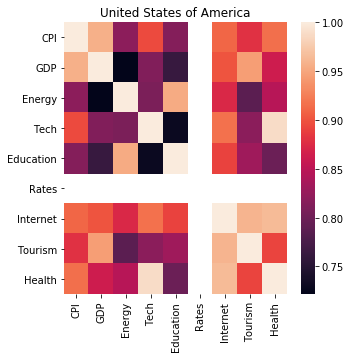

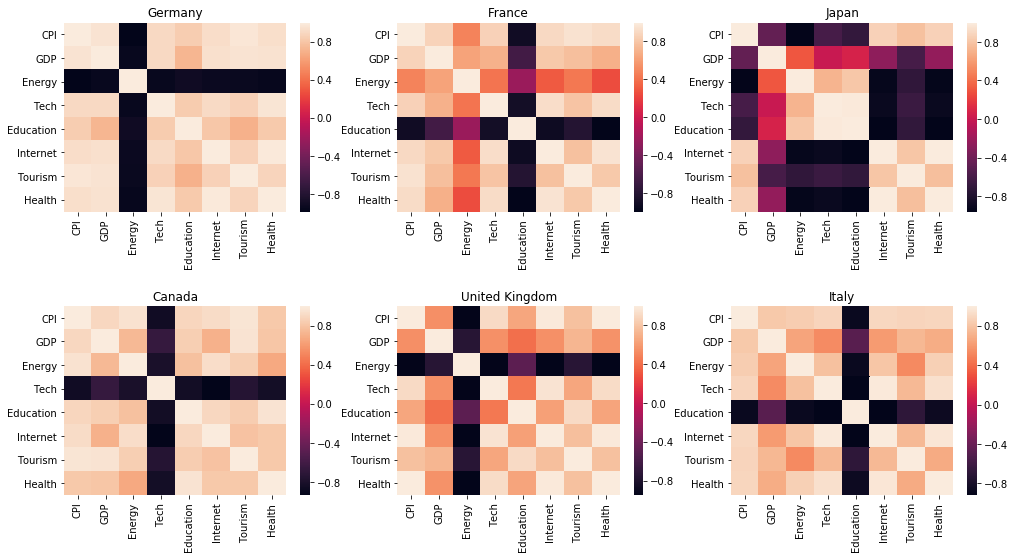

In [18]:
# first country:
plt.figure(figsize = (5, 5))
corr = df1[G7[0]].corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.title(G7[0])
plt.show()

# all other 6 countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1.2, hspace = 0.5)
for i in range(1, 7):
    plt.subplot(3,3,i)
    corr = df1[G7[i]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(G7[i])

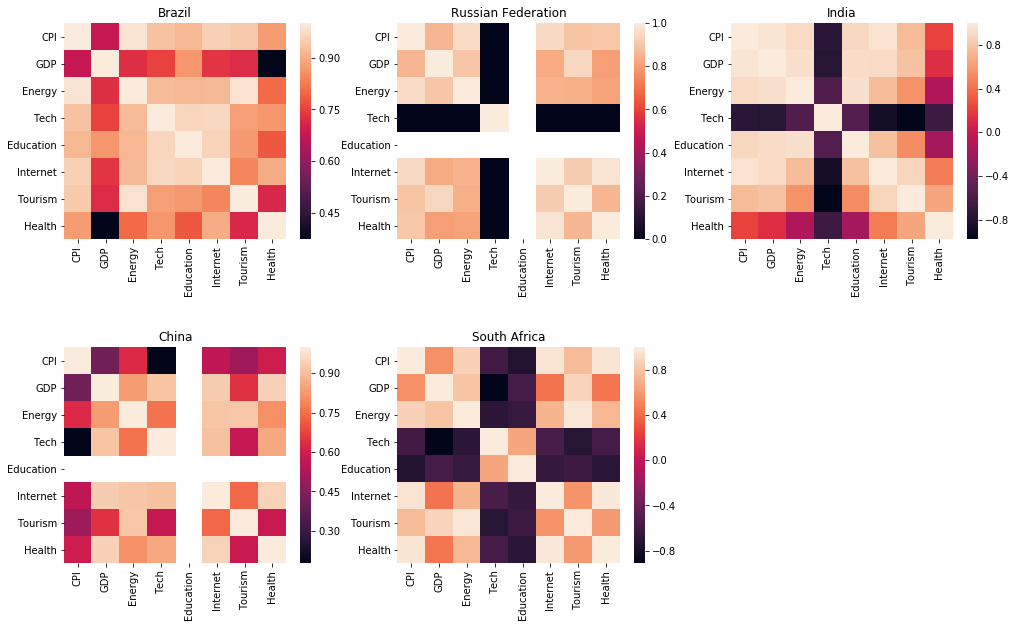

In [19]:
# first country in BRICS:
# plt.figure(figsize = (5, 5))
# corr = df2[BRICS[0]].corr()
# sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
# plt.title(BRICS[0])
# plt.show()

# all 5 countries:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(bottom = 0.5, right = 1, top = 1, hspace = 0.5)
for i in range(1, 6):
    plt.subplot(2,3,i)
    corr = df2[BRICS[i-1]].corr()
    sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
    plt.title(BRICS[i-1])

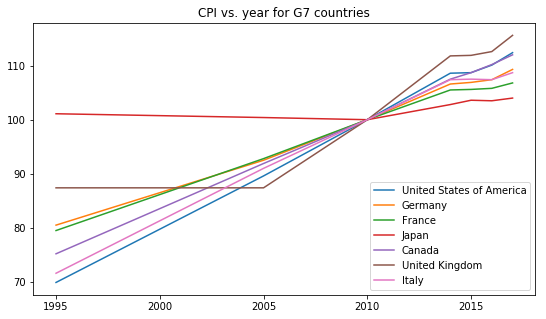

In [20]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].CPI, label = G7[i])
    plt.legend()
    plt.title("CPI vs. year for G7 countries")

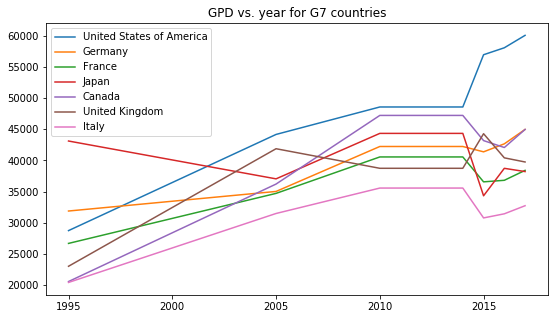

In [21]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].GDP, label = G7[i])
    plt.legend()
    plt.title("GPD vs. year for G7 countries")

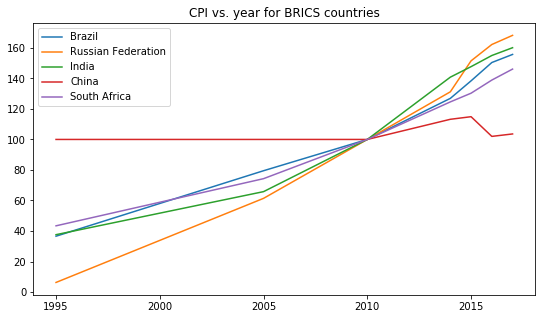

In [22]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. year for BRICS countries")

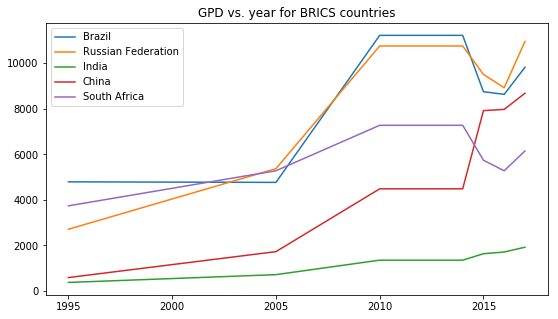

In [23]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].GDP, label = BRICS[i])
    plt.legend()
    plt.title("GPD vs. year for BRICS countries")

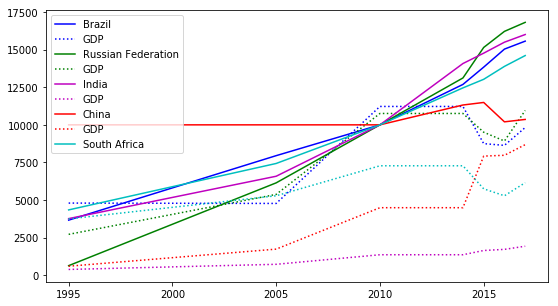

In [24]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI * 100, label = BRICS[i], color = colors[i], linestyle = "-")
    plt.legend()
    plt.plot(df2.index, df2[BRICS[i]].GDP, color = colors[i], linestyle = ":")


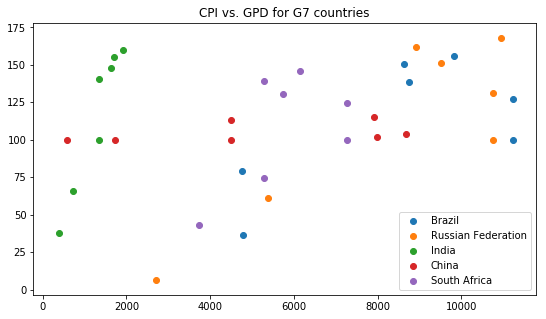

In [25]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    plt.scatter(df2[BRICS[i]].GDP, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. GPD for G7 countries")

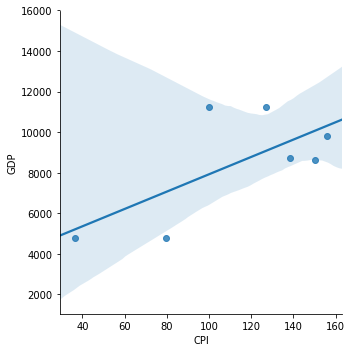

In [26]:
sns.lmplot("CPI", "GDP", data = df2[BRICS[0]])

<Figure size 648x360 with 0 Axes>

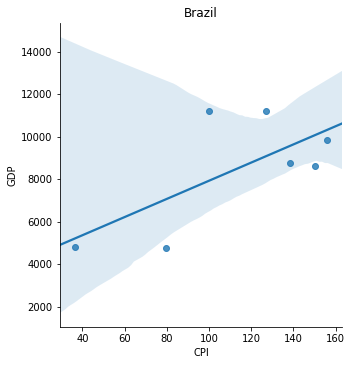

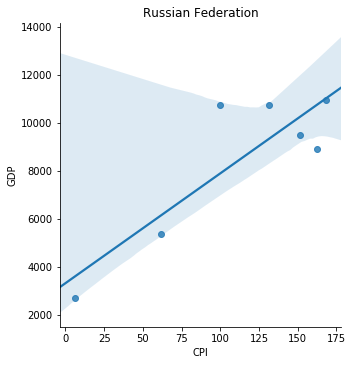

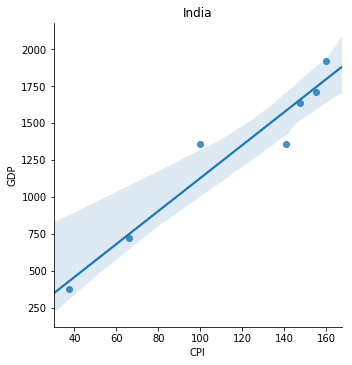

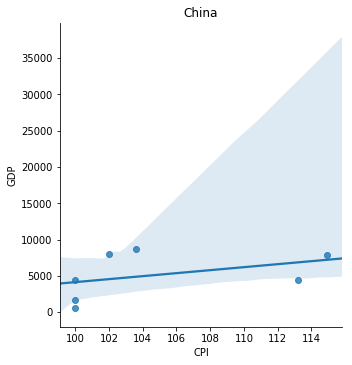

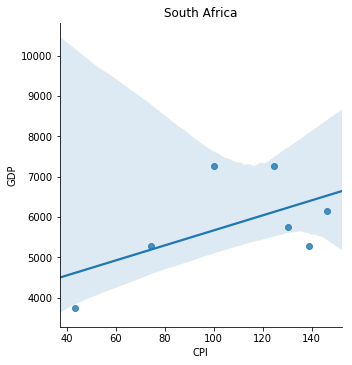

In [27]:
plt.figure(figsize = (9, 5))
colors = ["b","g","m","r","c","y","p"]
for i in range(5):
    # plt.subplot(2,3,i+1)
    sns.lmplot("CPI", "GDP", data = df2[BRICS[i]])
    plt.title(BRICS[i])


In [28]:
df1 = pd.concat([CPI.stack().loc[list(years), "Italy"], GDP.stack().loc[list(years), "Italy"], health.stack().loc[list(years), "Italy"]], axis = 1, keys = ["CPI", "GDP", "health"])

In [29]:
df2 = pd.concat([CPI.stack().loc[list(years), "France"], GDP.stack().loc[list(years), "France"], health.stack().loc[list(years), "France"]], axis = 1, keys = ["CPI", "GDP", "health"])

In [30]:
# Final dataframe for modeling:
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), 
                       pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]),
                       pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"],
                     axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table])
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), 
                       pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]),
                       pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"],
                     axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table])
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

df1.columns = df1.columns.droplevel(1)
df1["Country"] = df1.index.get_level_values(1)
df1.index = df1.index.droplevel(1)
df2.columns = df2.columns.droplevel(1)
df2["Country"] = df2.index.get_level_values(1)
df2.index = df2.index.droplevel(1)

In [31]:
# adding country_code variable:

# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
code1 = {"United States of America" : 1, "Germany" : 2, "France" : 3, "Japan" : 4, "Canada" : 5, 
         "United Kingdom" : 6, "Italy" : 7}
code2 = {"Brazil" : 8, "Russian Federation" : 9, "India" : 10, "China" : 11, "South Africa" : 12}
df1["Country_code"] = [code1[country] for country in df1.Country]
df2["Country_code"] = [code2[country] for country in df2.Country]
df1.head()

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code
Year,,,,,,,,,,,
1995,69.9,28758.0,68963.0,2.5,13.1,1,68.0,93743.0,14.5,United States of America,1
2005,89.6,44173.0,68124.0,2.5,13.1,1,68.0,122077.0,14.5,United States of America,1
2010,100.0,48574.0,71893.0,2.7,13.1,1,71.7,167996.0,16.4,United States of America,1
2014,108.6,48574.0,83426.0,2.7,13.5,1,73.0,167996.0,16.5,United States of America,1
2015,108.7,56948.0,84051.0,2.7,13.5,1,74.6,249183.0,16.8,United States of America,1


In [32]:
df1.head()

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code
Year,,,,,,,,,,,
1995,69.9,28758.0,68963.0,2.5,13.1,1,68.0,93743.0,14.5,United States of America,1
2005,89.6,44173.0,68124.0,2.5,13.1,1,68.0,122077.0,14.5,United States of America,1
2010,100.0,48574.0,71893.0,2.7,13.1,1,71.7,167996.0,16.4,United States of America,1
2014,108.6,48574.0,83426.0,2.7,13.5,1,73.0,167996.0,16.5,United States of America,1
2015,108.7,56948.0,84051.0,2.7,13.5,1,74.6,249183.0,16.8,United States of America,1


In [33]:
CPI.loc[years, G7].agg(["min","max"])

,United States of America,Germany,France,Japan,Canada,United Kingdom,Italy
min,69.9,80.5,79.5,100.0,75.2,87.4,71.6
max,112.4,109.3,106.8,104.0,112.0,115.6,108.7


In [34]:
CPI.loc[years, BRICS].agg(["min","max"])

,Brazil,Russian Federation,India,China,South Africa
min,36.6,6.3,37.6,100.0,43.4
max,155.7,168.2,160.1,114.9,146.1


In [35]:
# adding categorical label for response variable:
df1["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df1["CPI"]]
df2["CPI_Level"] = [3 if var > 120 else 3 if var > 120 else 2 if var > 80 else 1 for var in df2["CPI"]]
df2.head()

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code,CPI_Level
Year,,,,,,,,,,,,
1995,36.6,4794.0,5038.0,1.0,11.3,0.9,21.0,1085.0,8.0,Brazil,8,1
2005,79.5,4770.0,8344.0,1.0,11.3,2.4,21.0,4168.0,8.0,Brazil,8,1
2010,100.0,11224.0,10050.0,1.2,14.6,1.8,40.7,5522.0,8.0,Brazil,8,2
2014,126.9,11224.0,10965.0,1.2,15.7,2.4,54.6,5522.0,8.4,Brazil,8,3
2015,138.4,8750.0,11842.0,1.3,15.7,3.3,58.3,6254.0,8.9,Brazil,8,3


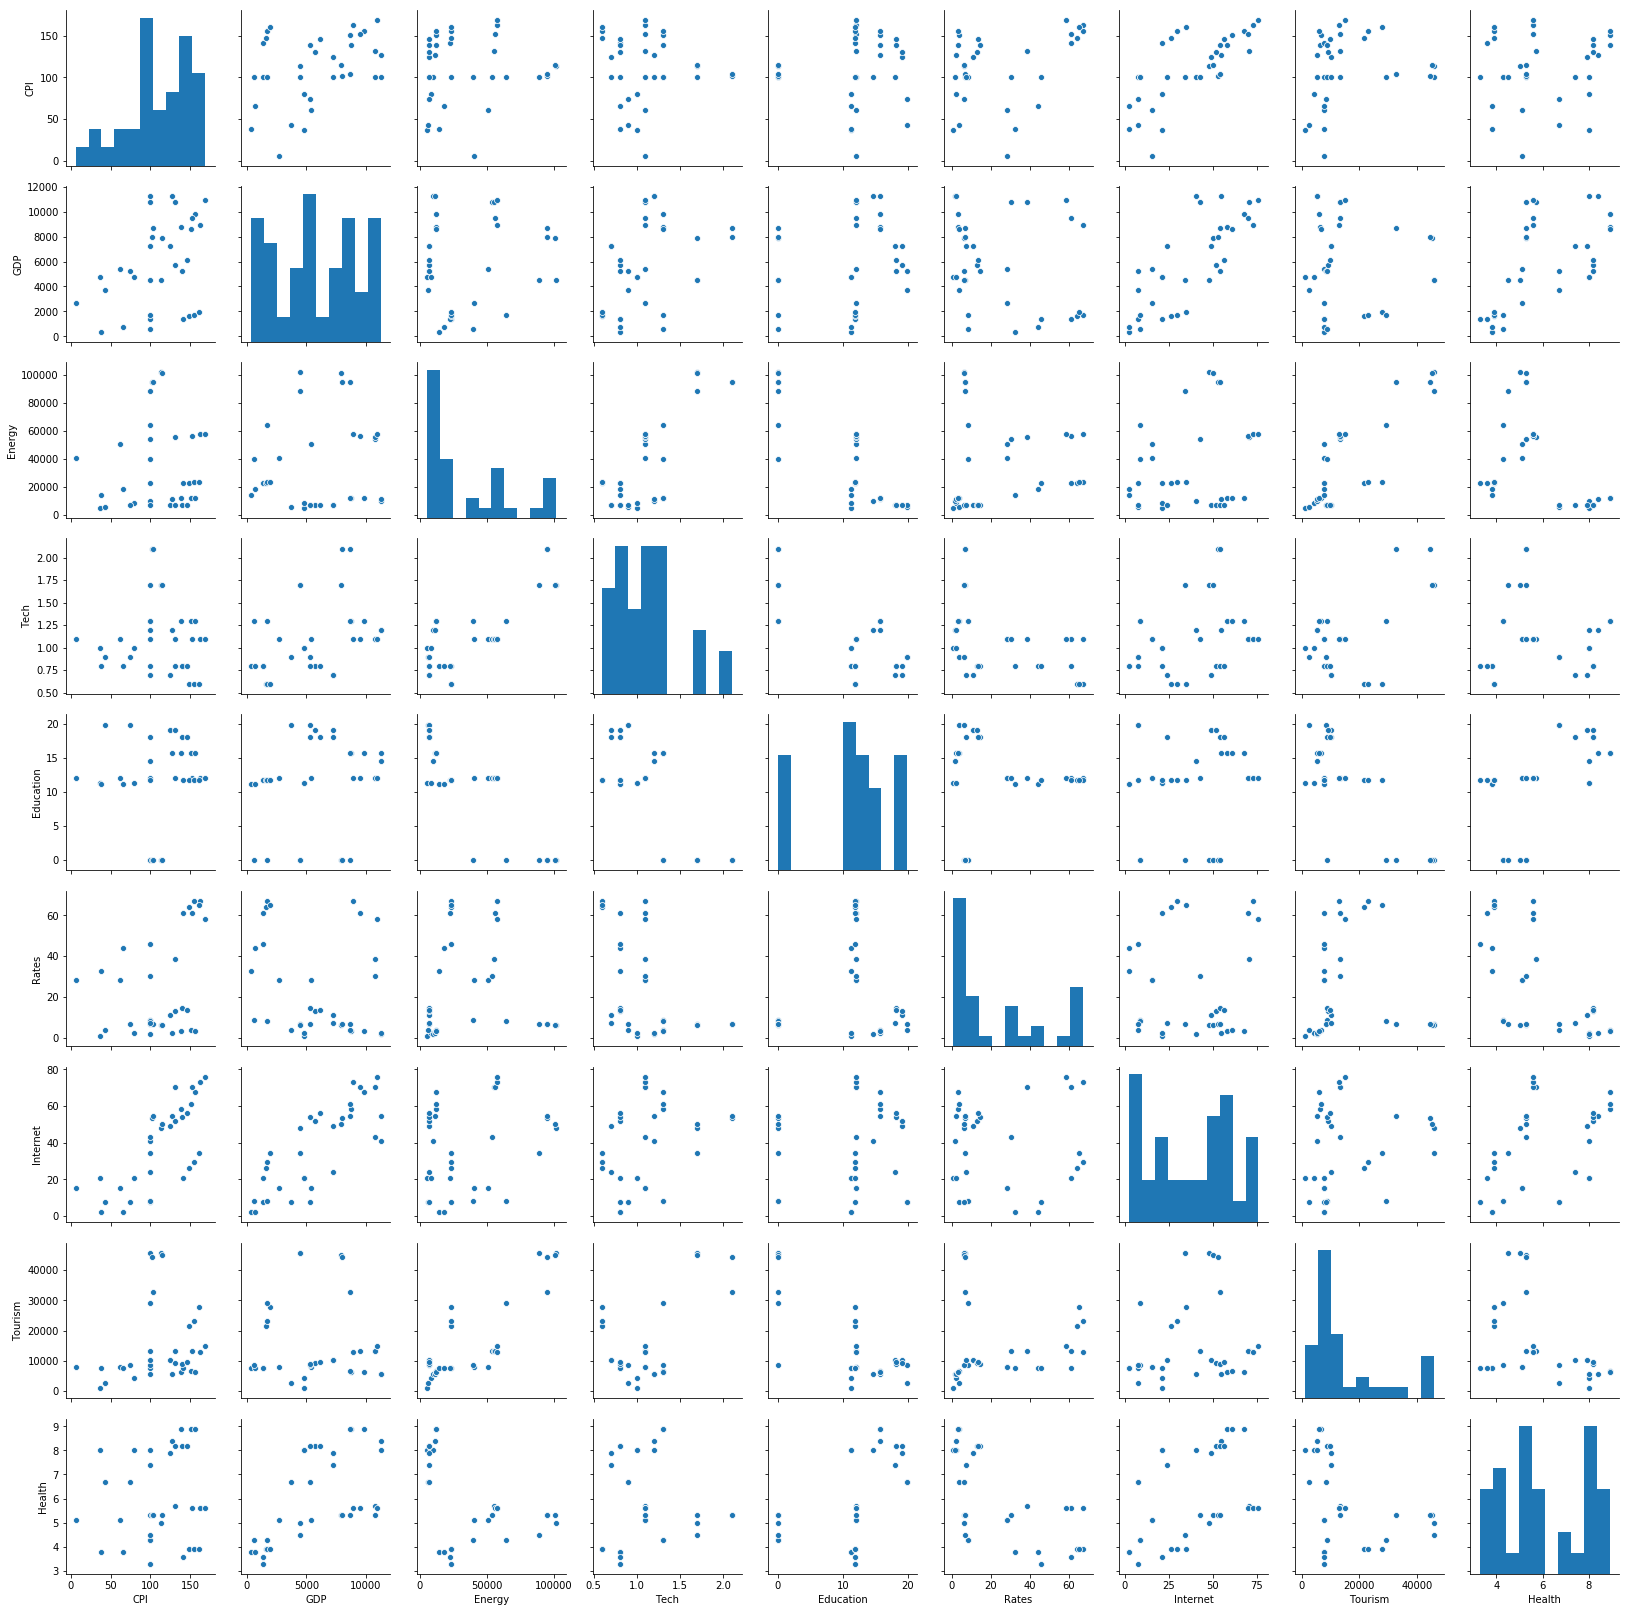

In [36]:
sns.pairplot(df2.iloc[:, 0:9].astype(float))
plt.show()

## 5. Data Modeling:

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### Cross Validation sets:

In [38]:
x1 = df1.iloc[:, [1,2,3,4,5,6,7,8,10]].astype(float)
y1 = df1.iloc[:, 11]
x2 = df2.iloc[:, [1,2,3,4,5,6,7,8,10]].astype(float)
y2 = df2.iloc[:, 11]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = x1.index)
print((x1_train).shape)
print((y1_train).shape)
print(x1.shape)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = x2.Country_code)
print((x2_train).shape)
print((y2_train).shape)
print(x2.shape)

(39, 9)
(39,)
(49, 9)
(28, 9)
(28,)
(35, 9)


### Part I: G7 countries

### (1) KNN classifier:

In [39]:
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print(prediction)
print(y1_test)
confusion_matrix(y1_test, prediction)

[2 2 2 2 2 2 2 2 2 2]
Year
2016    2
2014    2
2005    2
2017    2
2015    2
2010    2
2016    2
1995    2
2015    2
2014    2
Name: CPI_Level, dtype: int64


array([[10]])

### Paramter search using GridSearchCV:

In [40]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x1_train, y1_train)

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
print(n)
print(knn_grid.best_score_ )

knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print(prediction)
print(y1_test)
confusion_matrix(y1_test, prediction)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


1
0.9230769230769231
[2 2 2 2 2 2 2 1 2 2]
Year
2016    2
2014    2
2005    2
2017    2
2015    2
2010    2
2016    2
1995    2
2015    2
2014    2
Name: CPI_Level, dtype: int64


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([[0, 0],
       [1, 9]])

### (2) Naive Bayes Classifier:

In [41]:
naiveBayes = GaussianNB()
naiveBayes.fit(x1_train, y1_train)
print(naiveBayes.predict(x1_test))
print(y1_test.values)
confusion_matrix(y1_test, naiveBayes.predict(x1_test))

[2 2 2 2 2 2 1 1 1 2]
[2 2 2 2 2 2 2 2 2 2]


array([[0, 0],
       [3, 7]])

### (3): Regression model:

### Part II: BRICS countires

### (1) KNN classifier:

In [42]:
knn = KNeighborsClassifier()
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print(prediction)
print(y2_test.values)
confusion_matrix(y2_test, prediction)

[3 2 3 2 3 3 1]
[3 2 3 2 3 3 1]


array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 4]])

### Paramter search using GridSearchCV:

In [43]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x2_train, y2_train)
print(n)
print(knn_grid.best_score_ )

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print(prediction)
print(y2_test.values)
confusion_matrix(y2_test, prediction)

1
0.6071428571428571
[3 2 3 2 2 3 1]
[3 2 3 2 3 3 1]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([[1, 0, 0],
       [0, 2, 0],
       [0, 1, 3]])

### (2) Naive Bayes Classifier:

In [44]:
naiveBayes = GaussianNB()
naiveBayes.fit(x2_train, y2_train)
print(naiveBayes.predict(x2_test))
print(y2_test.values)
confusion_matrix(y2_test, naiveBayes.predict(x2_test))

[3 2 3 2 3 3 1]
[3 2 3 2 3 3 1]


array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 4]])

### Part III: G7 and BRICS combined:

### (1) Cross Validation sets:

In [45]:
x1 = df1.iloc[:, [1,2,3,4,5,6,7,8,10]].astype(float)
y1 = df1.iloc[:, 11]
x2 = df2.iloc[:, [1,2,3,4,5,6,7,8,10]].astype(float)
y2 = df2.iloc[:, 11]

x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print((x_train).shape)
print((y_train).shape)
print(x.shape)

(67, 9)
(67,)
(84, 9)


### (2) KNN classifier:

In [46]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction)
print(y_test.values)
confusion_matrix(y_test, prediction)

[2 3 3 2 3 3 3 1 3 2 2 2 2 2 2 2 1]
[1 2 3 2 1 1 1 3 3 2 2 2 2 2 2 2 3]


array([[0, 1, 3],
       [0, 8, 1],
       [2, 0, 2]])

### Paramter search using GridSearchCV:

In [47]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x_train, y_train)
print(n)
print(knn_grid.best_score_ )

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print(prediction)
print(y_test.values)
confusion_matrix(y_test, prediction)

1
0.8208955223880597
[2 3 3 2 3 1 1 3 3 2 2 2 3 2 2 2 3]
[1 2 3 2 1 1 1 3 3 2 2 2 2 2 2 2 3]


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([[2, 1, 1],
       [0, 7, 2],
       [0, 0, 4]])

### (3) Naive Bayes Classifier:

In [48]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
print(naiveBayes.predict(x_test))
print(y_test.values)
(confusion_matrix(y_test, naiveBayes.predict(x_test)))

[1 3 3 2 3 3 3 3 3 2 2 2 1 2 2 2 3]
[1 2 3 2 1 1 1 3 3 2 2 2 2 2 2 2 3]


array([[1, 0, 3],
       [1, 7, 1],
       [0, 0, 4]])

## 6. Results and Analysis: